Problem statement remains the same, but the dimensionality changes.

For instance, you are still given n pairs:  ${(\mathbf{x_1},y_1), (\mathbf{x_2},y_2), .. , (\mathbf{x_n},y_n)}$

With the difference that the $\mathbf{x_i}$ are now vectors.  

Dimensionality = size of vectors $\mathbf{x_i}$, represented by D.  

What was previously $a$ in $Y = a*X + b$, is now $\mathbf{w}$, also a vector with dimensionality D.

Our model : $\hat{y} = \mathbf{w}^T \mathbf{x} + b$

We can absorb $b$ into $\mathbf{w}$ by adding a column of 1s to our data matrix $\mathbf{x}$.

Original size of the data matrix was $ n \times D $, $n$ is the number of samples, and $D$ is the number of features.

N  
N  
N  
N  
N  
D D D D D D D  

Each row is a sample.  

In linear algebra, the convention is to think of single 1D vectors as column vectors $(D \times 1)$.

One sample prediction: $\hat{y_i}_{1 \times 1} = (\mathbf{w}^T)_{1 \times D} \mathbf{x_i}_{D \times 1}$  

N sample prediction:   $\hat{\mathbf{y}}_{N \times 1} =  \mathbf{X}_{N \times D} \mathbf{w}_{D \times 1} $  


In [11]:
# Pop Quiz
import numpy as np
X = np.array([[i*j for i in range(3)] for j in range(4)])
X
# How many samples and how many dimensions per sample?

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

In [13]:
# Ans.: 4 samples, and 3 dimensions per sample. A 4 by 3 matrix.

# What will the weight vector look like?
w = np.array([[5],[6],[7]])
w
# 3 x 1,  a column vector

array([[5],
       [6],
       [7]])

In [17]:
# How would you multiply these in Numpy?

# NOT (w.t).dot(X)
(w.transpose()).dot(X)

ValueError: shapes (1,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)

In [18]:
# Rather, X.dot(w)
X.dot(w)

array([[ 0],
       [20],
       [40],
       [60]])

In [19]:
# If you wanted a single prediction, say y_3, you could've used the original (w.t).dot(X) form:
(w.transpose()).dot(X[3])

array([60])

Just remember that the sample is horizontal in the presence of its peers (with other samples), but stands erect when alone.

### Solving for w

Just remember that like with 1D linear regression, you can use partial derivatives. What were once $a$ and $b$, are now just the components of $w$ : $w_j, j = 1.. D$

$\frac{\partial E}{\partial w_j} = \sum_{i=1}^n 2 (y_i - \mathbf{w}^T \mathbf{x_i}) (-x_{ij} ) = 0$

Remember that these are $D$ equations and $D$ unknowns ( one each for $j = 1 .. D$ )

After calculus and linear algebra, you arrive at:

$(\mathbf{X}^T \mathbf{X})\mathbf{w} = \mathbf{X}^T \mathbf{y}$  

Numpy offers a fast way of solving these:  
$Ax = b \Rightarrow x = $ np.linalg.solve$(A, b)$  

$(\mathbf{X}^T \mathbf{X})\mathbf{w} = \mathbf{X}^T \mathbf{y}  \Rightarrow w = $  np.linalg.solve$(\mathbf{X}^T \mathbf{X}, \mathbf{X}^T \mathbf{y})$ 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D   # NOTE mpl_toolkits.mplot3d (Q: Why the two spelling variants?)

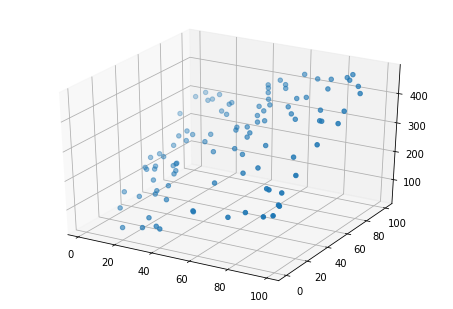

In [34]:
X = []
Y = []

for line in open('../machine_learning_examples/linear_regression_class/data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([1, float(x1), float(x2)])
    Y.append(float(y))
    
X, Y = np.array(X), np.array(Y)

fig = plt.figure()  # Get a figure object
ax = Axes3D(fig)    # Create 3D axes instead of the usual 2D (note the import required)

ax.scatter(X[:,1], X[:,2], Y)
plt.show()

In [26]:
# IMPORTANT NOTE: The default * operator does element by element multiplication on matrices. Use the np.dot function.

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))

In [27]:
Y_hat = np.dot(X, w) # NOTE: The change in order

In [28]:
d1 = (Y - Y_hat)
d2 = (Y - Y.mean())
R2 = 1 - d1.dot(d1) / d2.dot(d2)

In [29]:
R2

0.99800406124757779